In [1]:
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi']= 100  # parameter for resolution of graphics
import time

v = 5   # variant corresponding to the number of the function below
Niter = 1000 # Number of iterations
tol = 1e-14
x0 = 1.3 # Initialization
a = -2.5   # Lower bound for the plot interval
b = 2.5    # Upper bound for the plot interval

## Various objective functions

Here we consider multiple functions to be tested with Newton's method

Case 0: $f(x) = x^2$ (quadratic function, convergence in $1$ iteration)

Case 1: $f(x) = x^6/6-x^2/2+x$ (here the choice of the initialization is important)

Case 2: $f(x) = x^2-\sin x$ 

Case 3: $f(x) = x^2+\exp x$

Case 4: $f(x) = x^4$ (this does not verify the non-degeneracy hypothesis: quadratic convergence is not attained)

Case 5: $f(x) = \sqrt{1+x^2}$ (here the choice of initialization is important: for $|x|<1$ we have cubic convergence, while for $|x|\geq 1$ the algorithm diverges)

In [2]:
def fun(x, v):  # function definition
    if v == 0:
        return x**2
    if v == 1:
        return x**6 / 6 - x**2 / 2 + x
    if v == 2:
        return x**2 - np.sin(x)
    if v == 3:
        return x**2 + np.exp(x)
    if v == 4:
        return x**4
    if v == 5:
        return np.sqrt(1 + x**2)


def der(x, v):  # first derivative
    if v == 0:
        return 2 * x
    if v == 1:
        return x**5 - x + 1
    if v == 2:
        return 2 * x - np.cos(x)
    if v == 3:
        return 2 * x + np.exp(x)
    if v == 4:
        return 4 * x**3
    if v == 5:
        return x / np.sqrt(1 + x**2)


def der2(x, v):  # second derivative
    if v == 0:
        return 2
    if v == 1:
        return 5 * x**4 - 1
    if v == 2:
        return 2 + np.sin(x)
    if v == 3:
        return 2 + np.exp(x)
    if v == 4:
        return 12 * x**2
    if v == 5:
        return 1 / np.sqrt(1 + x**2)**3


# List of optimizers for the above functions
if v == 0:
    analytic = 0
if v == 1:
    analytic = -1.1673039782614187
if v == 2:
    analytic = 0.45018361129487355
if v == 3:
    analytic = -0.35173371124919584
if v == 4:
    analytic = 0
if v == 5:
    analytic = 0

/var/folders/rf/3_96g3x522q394xqlyg__5l00000gn/T/ipykernel_63646/3173919075.py:30: RuntimeWarning: invalid value encountered in double_scalars
  if abs(x1 - x0) / abs(x1) < tol or abs(fun(x1, v)) < tol:


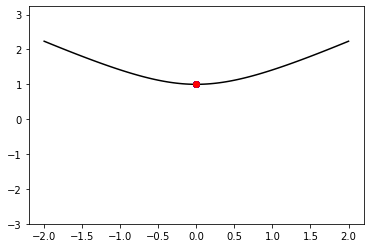

In [12]:
# Define a function that applies the Newton algorithm
# given a function with given first and second derivatives
def Newton(fun, der, der2, a, b, maxit, tol=1e-6):
    uplim = max(fun(a, v), fun(b, v)) + 1   # set limits for the plot window
    dnlim = -3
    t1 = np.linspace(a, b, 100)      # Create a discretization to be used with the plots
    plt.figure(1)
    plt.ylim([dnlim, uplim])         # Set upper bounds for the figure
    plt.plot(t1, fun(t1, v), 'k')      # Plot the function to be optimized on the interval [a, b]
    vals = []
    x0 = (a + b) / 2                # set initial point as the midpoint of the interval
    vals.append(x0)                 # Create a list which holds the optimization history
    
    for i in range(maxit):
        # Define the Newton interpolating polynomial: see the course   
        
        fv = fun(x0, v)
        plt.plot(x0, fv, 'bo')
        fp = der(x0, v)
        fpp = der2(x0, v)
        if fpp == 0:                 # avoid division by zero
            break
        # Compute the next point using the bisection method and Newton's method
        x1 = x0 - fp / fpp
        x2 = (a + b) / 2
        if x1 < a or x1 > b:         # if Newton's method goes outside the interval, use bisection method
            x1 = x2
            
        # check if the stopping criterion is reached
        if abs(x1 - x0) / abs(x1) < tol or abs(fun(x1, v)) < tol:
            print("Stopping criterion reached: exit the loop!")
            break
        if np.sign(fun(x1, v)) == np.sign(fun(x0, v)):  # determine the new interval bracketing the minimum
            a = x1
        else:
            b = x1
        x0 = x1
        plt.plot(x0, fun(x0, v), 'ro')          # Plot the next point
        vals.append(x0)                      # Update the list of values
    return np.array(vals)

# run the algorithm for one of the variants given
vals = Newton(fun, der, der2, -2, 2, 200, tol=1e-6)


Solution Found: 0.0


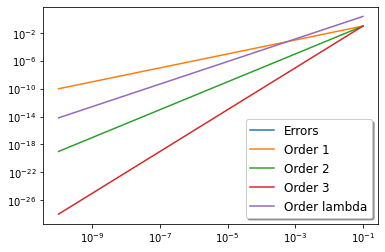

In [8]:
print("Solution Found:",vals[-1])          # Print the solution
#print("History:")                    # Print the values of the function throughout the optimization
#for i in range(0,vals.size):
#    print(i," ",vals[i])

dis = np.linspace(1,Niter,Niter)   # Error analysis     
errors = abs(vals-analytic)          # Compute differences between current points and the optimum
if(dis.size>10):
    dis2 = dis[0:10]
else:
    dis2 = dis
sq  = 0.1**dis2                      # Construct curve of order 1
sq2 = 10*sq**2                      # Construct curve of order 2
sq3 = 100*sq**3                      # Construct curve of order 3
lam = (np.sqrt(5)+1)/2

sqlam = 100*sq**lam                      # Construct curve of order 3



plt.figure(2)
plt.loglog(errors[:-1:],errors[1:],label='Errors')  # Plot the errors in log-log plot

plt.loglog(sq,sq,label='Order 1')
plt.loglog(sq,sq2,label='Order 2')                  # Plot order curves for comparison
plt.loglog(sq,sq3,label='Order 3')
plt.loglog(sq,sqlam,label='Order lambda')

plt.legend(loc='best', shadow=True, fontsize='large')  # Show legend
#plt.savefig('ConvOrder.png',dpi=300)
plt.show()                                          # Show plot